# bitmap drawing with a turtle in clojure



In [10]:

(import '(javax.swing JFrame JLabel))
(import java.awt.image.BufferedImage)
(import '(java.awt Dimension Color))
(import java.io.File)
(import javax.imageio.ImageIO)

class javax.imageio.ImageIO

In [11]:
(def deg (/ (Math/PI) 180))

(defn turtle [width height]
  (let [image  (BufferedImage. width height BufferedImage/TYPE_INT_RGB)]
    (ref {:width width :height height :image image 
	  :drawing true :point [0 0] :angle 0 :color Color/white})))

(defn pen-up? 
  "Is the pen up?"
  [turtle]
  (not (:drawing @turtle)))

(defn pen-up 
  "Disable Drawing."
  [turtle]
  (dosync (alter turtle merge {:drawing false})))

(defn pen-down 
  "Enable Drawing."
  [turtle]
  (dosync (alter turtle merge {:drawing true})))

(defn pen-color 
  "Set pen color"
  [turtle color]
  (dosync (alter turtle merge {:color color})))

(defn right 
  "Turn right through the angle <degrees>."
  [turtle degrees]
  (let [angle (:angle @turtle)
	heading (mod (+ angle degrees) 360)]
    (dosync (alter turtle merge {:angle heading}))))

(defn left 
  "Turn left through the angle <degrees>."
  [turtle degrees]
  (right turtle (- degrees)))

(defn- draw-line [turtle p1 p2]
  (doto (.getGraphics (:image @turtle))
    (.translate (/ (:width @turtle) 2) (/ (:width @turtle) 2))
    (.scale 1.0 -1.0)
    (.setColor (:color @turtle))
    (.drawLine (first p1) (second p1) (first p2) (second p2))))

(defn forward 
  "Move forward by <steps> turtle steps."
  [turtle steps]
  (let [p1 (:point @turtle)
	angle  (:angle @turtle)
	p2 [(+ (first p1) (* (Math/sin (* angle deg)) steps))
	    (+ (second p1) (* (Math/cos (* angle deg)) steps))] ]
    (if (true? (:drawing @turtle)) (draw-line turtle p1 p2))
    (dosync (alter turtle merge {:point p2}))))

(defn back
  "Move backward by <steps> turtle steps."
  [turtle steps]
  (forward turtle (- steps)))

(defn go 
  "Move to the given point."
  [turtle x y]
  (let [p1 (:point @turtle) p2 [x y]]
    (if (true? (:drawing @turtle)) (draw-line turtle p1 p2))
    (dosync (alter turtle merge {:point p2}))))

(defn toward 
  "Turn to face the given point."
  [turtle x y]
  (let [p (:point @turtle)
	polar (Math/atan2 (- (first p) x) (- (second p) y))
	angle (mod (/ polar deg) 360)]
    (dosync (alter turtle merge {:angle angle}))))

(defn distance 
  "Return the distance between the turtle and the given point."
  [turtle x y]
  (let [p (:point @turtle)]
    (Math/sqrt (+ (Math/pow (- (first p) x) 2)
		  (Math/pow (- (second p) y) 2)))))

(defn show [turtle]
  (doto (JFrame.)
    (.add (proxy [JLabel] [] 
	    (paint [g] (.drawImage g (:image @turtle) 0 0 this))))
    (.setSize (Dimension. (:width @turtle) (:height @turtle)))
    (.show)))

(defn write [turtle fname]
  (ImageIO/write (:image @turtle) "png" (File. fname)))

#'beaker_clojure_shell_f2c4961b-f480-42a2-a8f1-ab063bc43cd4/write

In [12]:
(def t (turtle 100 100))

#'beaker_clojure_shell_f2c4961b-f480-42a2-a8f1-ab063bc43cd4/t

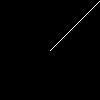

In [13]:
(pen-down t)
(go t 50 50)
(:image @t)

## TODO use EasyForm 

In [14]:
(def form (doto (com.twosigma.beakerx.easyform.EasyForm. "Test Form")
                (.addTextField "Name")
                (.addButton "Reverse" "reverse")))
form

In [15]:
(reverse (get form "Name"))

[]

## TODO use slider for arg values

In [16]:
%import com.twosigma.beakerx.widget.IntSlider

In [17]:
(new IntSlider)